In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# 1) Implement the k-means and Mean shift algorithms.
img = Image.open('Image/house.bmp')
img = np.array(img)

def kmeans(img, k):
    img = img.copy()
    repeat = 1                                                 # 반복 횟수 표시
    centroid = np.random.uniform(0,255,(k,3)).astype(np.uint8) # random initialization
    print('start')
    print(centroid)
    
    h,w = img.shape[:2]
    while True:
        print('number: ',repeat)                               # 반복횟수 표시
        repeat+=1
        
        # groups: 각 그룹의 RGB값 저장
        groups = [] 
        # indexes: 각 그룹의 index 저장
        indexes = []
        # cluster 개수에 맞게 리스트 추가
        for d in range(k):
            groups.append([])
            indexes.append([])
            
        # 거리가 가장 가까운 group에 각 RGB값과 index 추가
        for i in range(h):
            for j in range(w):
                distances = np.array([])
                for d in range(k):
                    distances = np.append(distances, np.sum((img[i,j,:] - centroid[d])**2))
                idx=np.argmin(distances)
                groups[idx].append(img[i,j])
                indexes[idx].append([i,j])
        
        # 각 그룹의 픽셀 평균값으로 다음 centroid 계산
        next_centroid = np.zeros((k,3),dtype='int')
        for d in range(k):
            next_centroid[d] = np.array(groups[d]).mean(axis=0)
        print(next_centroid)
        
        # 종료조건
        if(np.array_equal(centroid, next_centroid)):
            print('find!')
            break
        centroid = next_centroid
    
    # Cluster the image: 각 그룹에 centroid 값 할당
    for i in range(k):
        for j in range(len(indexes[i])):
            img[indexes[i][j][0],indexes[i][j][1],:]=centroid[i]
    return centroid, img

centroids, result_img = kmeans(img,10)

start
[[153  68  95]
 [ 82  56 165]
 [175 144 233]
 [ 11 117  16]
 [239 118 146]
 [252 131 197]
 [136 231 132]
 [123 146 187]
 [173  39  32]
 [121  87 183]]
number:  1
[[154 173 193]
 [131 101 107]
 [152 111 109]
 [140 109 111]
 [139 105 107]
 [133 104 109]
 [146 109 108]
 [131 104 109]
 [153 114 113]
 [129 101 106]]
number:  2
[[161 196 215]
 [145  50 160]
 [166 105  94]
 [129 127 127]
 [147  95  90]
 [133 103 112]
 [153  97  90]
 [118 112 122]
 [166 125 117]
 [100  68  81]]
number:  3
[[162 198 218]
 [159   0 222]
 [168 106  95]
 [132 142 145]
 [137  90  87]
 [123  96 105]
 [157  97  89]
 [110 107 116]
 [171 125 116]
 [ 94  59  74]]
number:  4
[[163 199 219]
 [159   0 222]
 [168 107  96]
 [136 151 157]
 [126  82  85]
 [119  94 102]
 [158  98  89]
 [112 110 115]
 [172 122 113]
 [ 91  55  72]]
number:  5
[[163 199 219]
 [159   0 222]
 [168 107  96]
 [139 155 161]
 [114  76  83]
 [118  93 102]
 [159  98  89]
 [119 114 118]
 [172 120 111]
 [ 88  52  70]]
number:  6
[[163 199 220]
 [159  

< result centroid >
[[163 199 220]
 [159   0 222]
 [168 106  95]
 [148 165 171]
 [100  63  76]
 [118  94 101]
 [158  98  89]
 [126 133 137]
 [171 116 108]
 [ 70  37  63]]


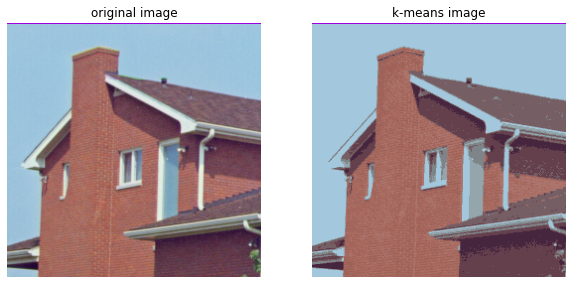

In [3]:
print('< result centroid >')
print( centroids)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.axis('off')
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('k-means image')
plt.axis('off')
plt.imshow(result_img)

In [4]:
print(np.sort(centroids))

[[163 199 220]
 [  0 159 222]
 [ 95 106 168]
 [148 165 171]
 [ 63  76 100]
 [ 94 101 118]
 [ 89  98 158]
 [126 133 137]
 [108 116 171]
 [ 37  63  70]]


Text(0.5, 0.98, 'K-means Scatter')

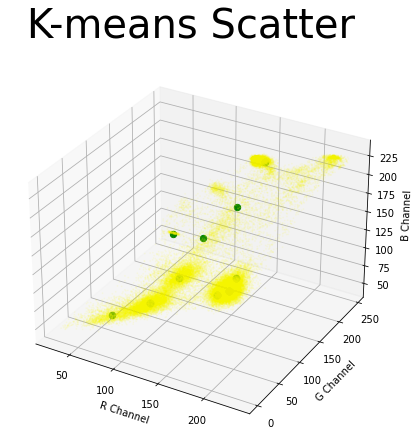

In [5]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(img[:,:,0],img[:,:,1],img[:,:,2], s=1, alpha = 0.05, c='yellow')
for p in centroids:
    ax.scatter(p[0], p[1], p[2], c='green', s=40, alpha=1)
ax.set_xlabel('R Channel')
ax.set_ylabel('G Channel')
ax.set_zlabel('B Channel')
plt.suptitle('K-means Scatter', fontsize = 40)

In [17]:
src = cv2.imread('Image/house.bmp')

# 307200, 3
data = src.reshape((-1, 3)).astype(np.float32)

# K-means 알고리즘
criteria = (cv2.TERM_CRITERIA_EPS|cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

K=5
ret, label, center = cv2.kmeans(data, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
center = center.astype('uint8')
    
dst = center[label.flatten()]     
dst = dst.reshape((src.shape))
    
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

In [43]:
img = Image.open('Image/house.bmp')
img = np.array(img)

def distance(a,b):  # L^1 norm
    return np.sum(np.abs(a-b))

def mean_shift(img):
    h,w = img.shape[:2]
    
    # RGB plane에 점들을 나타냄
    temp = np.zeros((256,256,256))  
    for i in range(h):
        for j in range(w):
            r,g,b = img[i,j]
            temp[r,g,b] += 1
            
    # RGB값이 존재하는 index만 가져옴
    meanList = []
    temp_idx = np.where( temp > 0)
    index_R = temp_idx[0]
    index_G = temp_idx[1]
    index_B = temp_idx[2]
            
    mask_size = 32  # 64 x 64 x 64 : 3차원 마스크
    
    # 모든 index값에 대해 실행하면 수행시간 길어짐
    for j in range(int(len(index_R)/100) ): #len(index_R)): int(len(index_R)/500)
        i = j*100
        
        # masking 해야하는 index 추출 
        idx1 = np.clip( np.array([index_R[i]-mask_size, index_G[i]-mask_size, index_B[i]-mask_size]), 0, 255)
        idx2 = np.clip( np.array([index_R[i]+mask_size, index_G[i]+mask_size, index_B[i]+mask_size]), 0, 255)
        previous_mean = np.array([index_R[i], index_G[i], index_B[i]])
        
        repeat=0
        while True:
            repeat += 1
            # masking 이후 mean 계산
            subArea = temp[idx1[0]:idx2[0],idx1[1]:idx2[1],idx1[2]:idx2[2]].copy()
            index_r = np.nonzero(subArea)[0]
            index_g = np.nonzero(subArea)[1]
            index_b = np.nonzero(subArea)[2]
            
            mean = np.array([0,0,0],dtype='int64')
            total = 0
            for i in range(len(index_r)):
                mean = mean + ( np.array([index_r[i]+idx1[0],index_g[i]+idx1[1],index_b[i]+idx1[2]]) \
                                                                          * subArea[index_r[i],index_g[i],index_b[i]] )
                total += subArea[index_r[i],index_g[i],index_b[i]]
            mean = np.round( mean / total).astype('int64')
            
            # previous, current mean 사이의 거리 비교
            d = distance(mean, previous_mean)
            previous_mean = mean
            # 거리가 가까운 경우 종료
            if d < 5:
                meanList.append(mean)
                break
            
            # 다음 masking을 위한 indexing
            idx1 = np.clip( np.array([mean[0]-mask_size, mean[1]-mask_size, mean[2]-mask_size]), 0, 255)
            idx2 = np.clip( np.array([mean[0]+mask_size, mean[1]+mask_size, mean[2]+mask_size]), 0, 255)
            
    # mean으로 계산된 centroid list를 반환
    meanList = np.array(meanList)
    for i in range(len(meanList)):
        for j in range(i+1, len(meanList)):
            d = distance(meanList[i], meanList[j])
            if d < 10:
                meanList[j] = meanList[i]

    return np.unique(meanList,axis=0)

result = mean_shift(img)
print('result')
print(result)

result
[[105  72  84]
 [108  76  87]
 [136  94  95]
 [137 153 161]
 [139 157 166]
 [140 146 147]
 [149 174 185]
 [158 197 221]
 [160   0 223]
 [165 106  97]
 [211 221 216]]


Text(0.5, 0.98, 'mean-Shift Scatter')

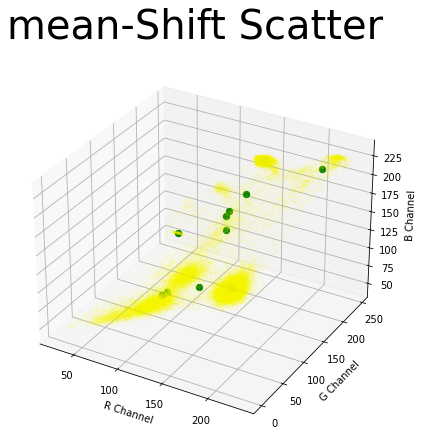

In [44]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(img[:,:,0],img[:,:,1],img[:,:,2], s=1, alpha = 0.05, c='yellow')
for p in result:
    ax.scatter(p[0], p[1], p[2], c='green', s=40)
ax.set_xlabel('R Channel')
ax.set_ylabel('G Channel')
ax.set_zlabel('B Channel')
plt.suptitle('mean-Shift Scatter', fontsize = 40)

(256, 256, 3)


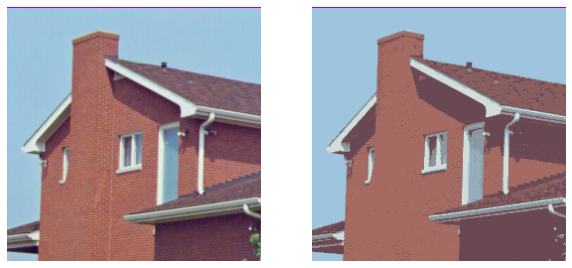

In [45]:
img = Image.open('Image/house.bmp')
img = np.array(img)
print(img.shape)

# 각 cluster에 centroid 값 할당
def clusterring(img, centroids):
    h,w = img.shape[:2]
    result = img.copy()
    for i in range(h):
        for j in range(w):
            M = 1000
            temp = [0,0,0]
            for centroid in centroids:
                d = distance(centroid, img[i,j])
                if d < M:
                    M=d
                    temp = centroid
            result[i,j,0] = temp[0]
            result[i,j,1] = temp[1]
            result[i,j,2] = temp[2]
    return result

result_img = clusterring(img, result)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(img)
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(result_img)      